In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the ticker symbol for Solana
sol_ticker = yf.Ticker("SOL-USD")
csv_file = "sol.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Solana
sol = sol_ticker.history(period="max")
sol.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
sol = pd.read_csv(csv_file, index_col=0)
sol

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-14 00:00:00+00:00,147.282043,148.789337,140.115387,143.094437,2330458883,0.0,0.0
2024-06-15 00:00:00+00:00,143.074081,145.540970,143.023651,145.412216,1065293341,0.0,0.0
2024-06-16 00:00:00+00:00,145.417969,151.125504,143.179535,151.125504,1147997523,0.0,0.0


<Axes: xlabel='Date'>

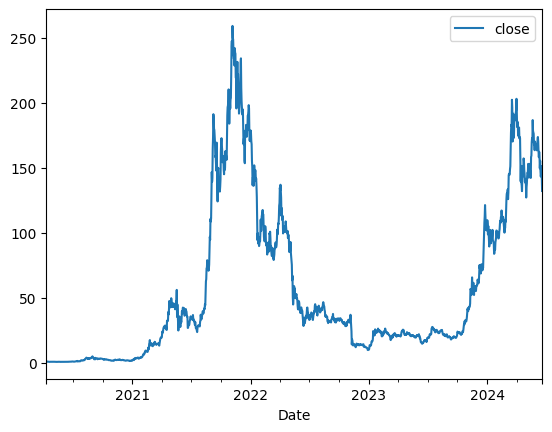

In [3]:
# Convert index to datetime
sol.index = pd.to_datetime(sol.index)

# Remove unnecessary columns
del sol["Dividends"]
del sol["Stock Splits"]

# Convert column names to lowercase
sol.columns = [c.lower() for c in sol.columns]

# Plot the closing price
sol.plot.line(y="close", use_index=True)


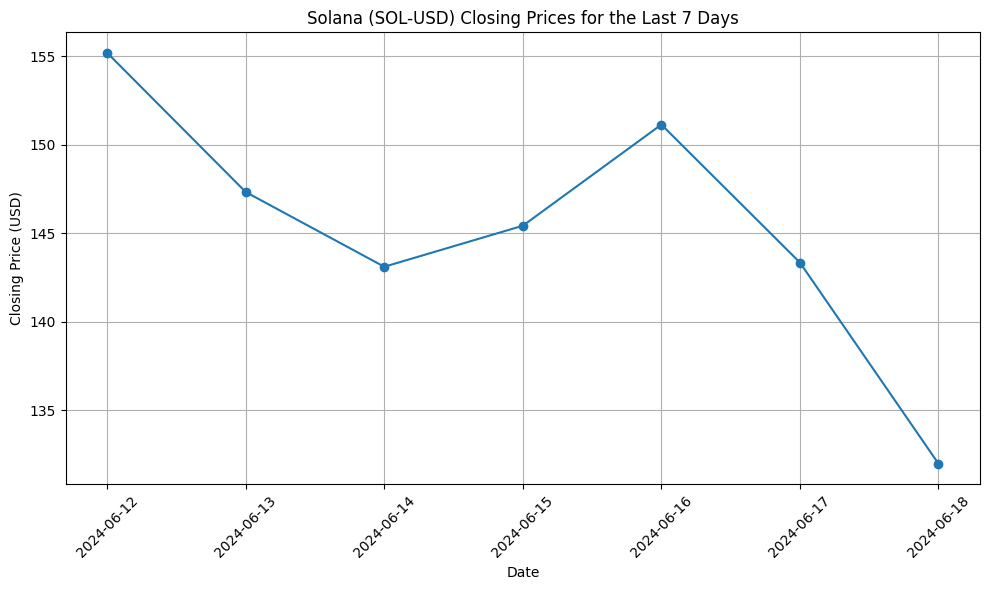

In [4]:
last_seven_days = sol[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days.index, last_seven_days['close'], marker='o')
plt.title('Solana (SOL-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("solana_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2021-12-02,2.466667,-0.115112,0.526768
2021-12-06,2.433333,-0.147124,0.543434
2021-12-08,2.400000,-0.176140,0.560101
2021-12-09,2.466667,-0.215607,0.582323
2021-12-13,2.533333,-0.234919,0.593434
...,...,...,...
2024-02-19,2.933333,-0.214769,0.604246
2024-02-20,3.100000,-0.202918,0.598690
2024-02-21,3.166667,-0.180640,0.587579
2024-03-14,3.133333,-0.147472,0.570913


In [6]:
# Assuming 'sol' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
sol = sol.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
sol["tomorrow"] = sol["close"].shift(-1)
sol["target"] = (sol["tomorrow"] > sol["close"]).astype(int)
sol["target"].value_counts()


target
1    81
0    80
Name: count, dtype: int64

In [7]:
sol

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2021-12-02 00:00:00+00:00,229.854706,243.111664,220.387177,233.993042,4074103518,2.466667,-0.115112,0.526768,194.199219,0
2021-12-06 00:00:00+00:00,196.547485,197.663025,176.888062,194.199219,3693853028,2.433333,-0.147124,0.543434,194.621704,1
2021-12-08 00:00:00+00:00,190.505005,196.374115,184.132706,194.621704,2277446203,2.400000,-0.176140,0.560101,181.178085,0
2021-12-09 00:00:00+00:00,194.483292,196.689743,178.792145,181.178085,1968182104,2.466667,-0.215607,0.582323,155.213058,0
2021-12-13 00:00:00+00:00,173.099930,173.099930,148.571823,155.213058,2547597256,2.533333,-0.234919,0.593434,153.341446,0
...,...,...,...,...,...,...,...,...,...,...
2024-02-19 00:00:00+00:00,112.178825,114.717979,111.081413,111.485329,1898655220,2.933333,-0.214769,0.604246,108.459641,0
2024-02-20 00:00:00+00:00,111.483444,112.036743,104.890228,108.459641,2656976089,3.100000,-0.202918,0.598690,105.125221,0
2024-02-21 00:00:00+00:00,108.452667,108.452667,100.412018,105.125221,2246861647,3.166667,-0.180640,0.587579,176.679749,1
2024-03-14 00:00:00+00:00,163.839935,177.892624,160.233551,176.679749,8399967972,3.133333,-0.147472,0.570913,202.123566,1


In [8]:
sol.to_csv('solSentiment.csv')